# Parte 1

- Cristian Bellucci

- matricola: 178906

## 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('loan_sanction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


il dataset ha 614 istanze e 13 attributi

In [35]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
print('il dataset ha', df.isnull().sum().sum(), 'valori nulli')

il dataset ha 149 valori nulli


<Axes: ylabel='Loan_Status'>

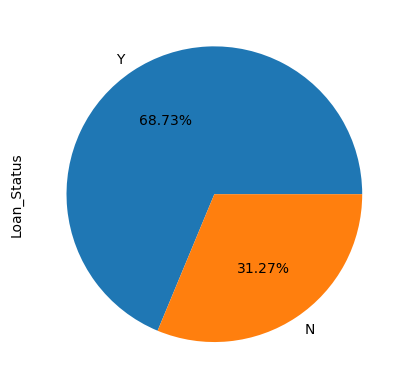

In [37]:
df['Loan_Status'].value_counts().plot(kind='pie', autopct='%.2f%%')

il dataset è sbilanciato avendo più esempi con Loan_status = yes

## 1.2

<Axes: xlabel='Gender', ylabel='count'>

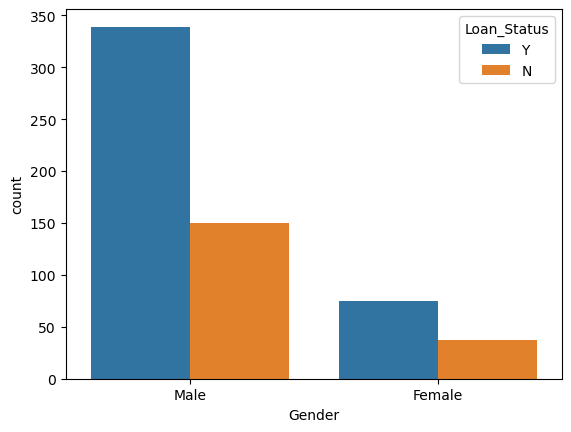

In [38]:
sns.countplot(df, x = 'Gender', hue='Loan_Status')


In [48]:
# pivot table di uomini/donne sposati/non sposati



pivot = pd.pivot_table(df, columns='Married', index='Gender', values='Loan_Status')
pivot

Married,No,Yes
Gender,,
Female,0.637500,0.741935
Male,0.623077,0.717087


In [46]:
df.loc[df['Loan_Status'] == 'Y', 'Loan_Status'] = 1
df.loc[df['Loan_Status'] == 'N', 'Loan_Status'] = 0
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [134]:
# 2.4
df['relation'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,relation
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,0.023500


<Axes: >

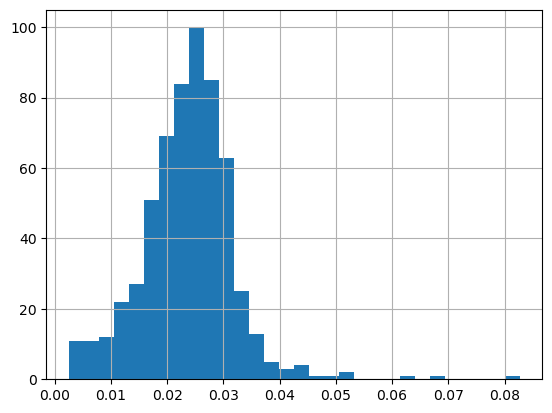

In [135]:
df['relation'].hist(bins=30)

# Parte 2


In [49]:
#trasformatori e pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
#metriche e modelli
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression


#funzione per calcolare confusion matrix e il report
def plot_confusion_matrix(confusion_matrix):
    cm = confusion_matrix
    # Calcolo dei conteggi non normalizzati
    group_counts = ["{0:0.0f}\n({1:0.2%})".format(value, value/np.sum(cm)) for value in cm.flatten()]

    # Calcolo dei conteggi normalizzati
    group_percentages = ["{0:.2%}\n({1:0.0f})".format(value, value*np.sum(cm)) for value in cm.flatten()/np.sum(cm)]

    # Trasformazione dei conteggi in una matrice quadrata
    labels = np.asarray(group_counts).reshape(cm.shape[0],cm.shape[1])

    plot = sns.heatmap(cm, annot = labels, fmt='', cmap='Blues')
    plot.set_title('Confusion Matrix')
    plot.set_ylabel('True class')
    plot.set_xlabel('Predicted class')
    plt.show()


def gridSearch(model, param_grid, cv, X_train, y_train, X_test, y_test): #works also with pipelines
    clf = GridSearchCV(model, param_grid, cv=cv)
    clf.fit(X_train, y_train)
    print('best parameters: ', clf.best_params_)
    print('with accuracy: ', clf.best_score_)
    print()
    model.set_params(**clf.best_params_)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    print('acc sul train del modello con i parametri ottimizzati: ', acc_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('acc del modello con i parametri ottimizzati: : ', acc)
    print('--------------------------------------------------------------------')
    return model


# def compareModels(model_list, X_train, y_train, X_test, y_test):
#     for m in model_list:
#         m.fit(X_train, y_train)
#         y_pred_train = m.predict(X_train)
#         y_pred = m.predict(X_test)
#         print(m)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         cm = confusion_matrix(y_test, y_pred)
#         plot_confusion_matrix(cm)
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')

#prende in input un modello o una lista di modelli e fa il cross validation
def crossValidation(model,cv, X, y):
        cross_val = cross_val_score(m, X, y, cv = cv, scoring = 'accuracy') 
        print(model)
        # print()
        print('cross validation scores: ', cross_val)
        # print()
        # print('accuracy media', cross_val.mean())
        # print()
        print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))
        print('--------------------------------------------------------------------')
        return model



# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
def  testModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy test: ', accuracy_score(y_test, y_pred))
    print('--------------------------------------------------------------------')    
    return model

# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
# stampa la confusion matrix e il classification report
def testModelWithConfusionMatrix(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy test: ', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print()
    print('--------------------------------------------------------------------')
    print('classification report: ')
    print()
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------')

# input d'esempio 
# models = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier()]
# pipeline = Pipeline(steps=[('col_trasf', col_trasf), ('scaler', scaler), ('models_list', models)])
# def testPipelineOnModels(pipeline, models_list, X_train, y_train, X_test, y_test):
#     for m in models_list:
#         print(m)
#         pipeline.fit(X_train, y_train)
#         y_pred_train = pipeline.predict(X_train)
#         y_pred = pipeline.predict(X_test)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')
  

# per fare il feature union fra il dataset originale e le nuove colonne da aggiungere
def identity(X):
  return X
identity = FunctionTransformer(identity, validate=True)

#trasforma le colonne categoriche in numeriche con ordinal encoder
def categoricalToNumerical(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    data = dt.copy()
    oe = OrdinalEncoder()
    data[categorical_columns] = oe.fit_transform(data[categorical_columns])
    data = pd.DataFrame(data, columns = dt.columns)
    return data

# ritorna lista delle colonne categoriche di un dataframe dato in input
def categoricalColumns(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

# ritorna lista delle colonne numeriche di un dataframe dato in input
def numericalColumns(dt):
    numerical_columns = dt.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numerical_columns


## 2.1

In [60]:
dataset = pd.read_csv('loan_sanction_train.csv')
dataset.head()
dataset.drop('Loan_ID', axis = 1, inplace = True) # lo elimino perchè è l'identificativo di ogni utente ed è inutile nella predizione di loan status
dataset.head()
# elimino istanze con valori nulli
dataset.dropna(inplace = True)

Loan_ID lo elimino perchè è l'identificativo di ogni utente ed è inutile nella predizione di loan status

In [61]:
# trasformo le colonne categoriche in numeriche
dataset = categoricalToNumerical(dataset)
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417,4196.0,267.0,360.0,1.0,2.0,1.0


In [62]:
X = dataset.drop('Loan_Status', axis = 1)
y = dataset['Loan_Status']

print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (480, 11)
y shape:  (480,)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, stratify = y)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


X_train shape:  (320, 11)
y_train shape:  (320,)
X_test shape:  (160, 11)
y_test shape:  (160,)


DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.66875


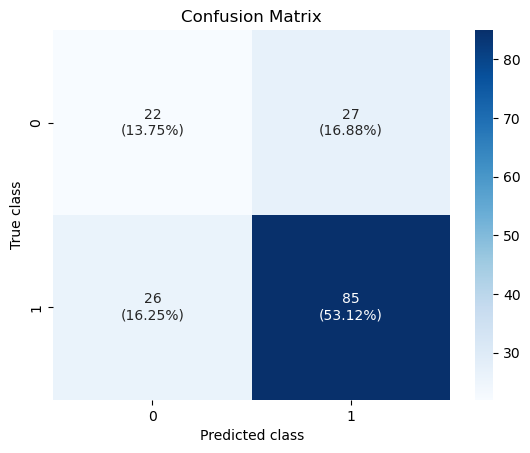


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.46      0.45      0.45        49
         1.0       0.76      0.77      0.76       111

    accuracy                           0.67       160
   macro avg       0.61      0.61      0.61       160
weighted avg       0.67      0.67      0.67       160

--------------------------------------------------------------------
KNeighborsClassifier()
accuracy train:  0.740625
accuracy test:  0.64375


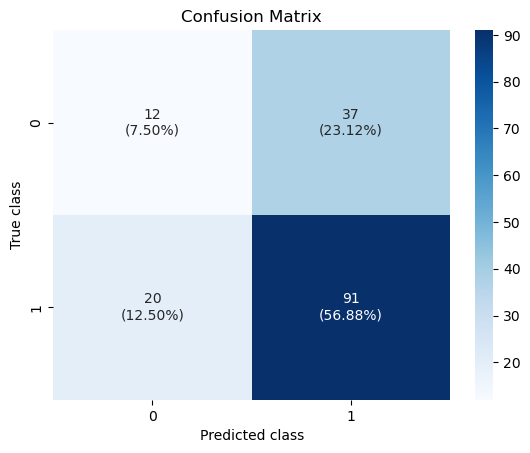


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.38      0.24      0.30        49
         1.0       0.71      0.82      0.76       111

    accuracy                           0.64       160
   macro avg       0.54      0.53      0.53       160
weighted avg       0.61      0.64      0.62       160

--------------------------------------------------------------------
DummyClassifier(strategy='most_frequent')
accuracy train:  0.690625
accuracy test:  0.69375


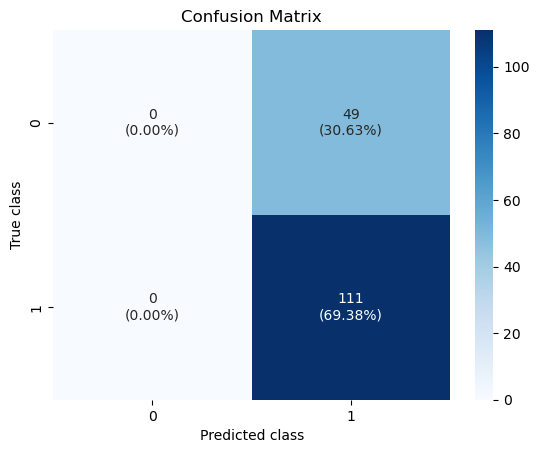


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        49
         1.0       0.69      1.00      0.82       111

    accuracy                           0.69       160
   macro avg       0.35      0.50      0.41       160
weighted avg       0.48      0.69      0.57       160

--------------------------------------------------------------------


c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39379\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
models = [DecisionTreeClassifier(), KNeighborsClassifier(), DummyClassifier(strategy = 'most_frequent')]
for m in models:
        testModelWithConfusionMatrix(m, X_train, y_train, X_test, y_test)



Analizzando gli output degli stimatori possiamo notare come lo sbilanciamento dei dati della classe da predirre, faciliti per gli stimatori la predizione della classe maggioritaria.

## 2.2

In [65]:
# cross validation
for m in models:
    crossValidation(m, 10, X, y)

DecisionTreeClassifier()
cross validation scores:  [0.70833333 0.75       0.6875     0.58333333 0.77083333 0.70833333
 0.8125     0.6875     0.77083333 0.54166667]
Accuracy con incertezza: 0.70 (+/- 0.16)
--------------------------------------------------------------------
KNeighborsClassifier()
cross validation scores:  [0.70833333 0.64583333 0.625      0.6875     0.6875     0.6875
 0.54166667 0.60416667 0.64583333 0.64583333]
Accuracy con incertezza: 0.65 (+/- 0.09)
--------------------------------------------------------------------
DummyClassifier(strategy='most_frequent')
cross validation scores:  [0.6875     0.6875     0.6875     0.6875     0.6875     0.6875
 0.6875     0.6875     0.70833333 0.70833333]
Accuracy con incertezza: 0.69 (+/- 0.02)
--------------------------------------------------------------------


## 2.3

In [67]:
# grid search per KNN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50), 'weights': ['uniform', 'distance']}

gridSearch(knn, param_grid,None, X_train, y_train, X_test, y_test)



best parameters:  {'n_neighbors': 23, 'weights': 'uniform'}
with accuracy:  0.690625

acc sul train del modello con i parametri ottimizzati:  0.690625
acc del modello con i parametri ottimizzati: :  0.69375
--------------------------------------------------------------------


KNeighborsClassifier(n_neighbors=23)

In [68]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
27,1.0,1.0,2.0,1.0,0.0,4226,1040.0,110.0,360.0,1.0,2.0
33,1.0,1.0,0.0,0.0,0.0,3500,1667.0,114.0,360.0,1.0,1.0
118,1.0,1.0,0.0,0.0,0.0,5568,2142.0,175.0,360.0,1.0,0.0
458,1.0,0.0,2.0,0.0,0.0,4354,0.0,136.0,360.0,1.0,0.0
448,1.0,1.0,2.0,0.0,0.0,3340,1710.0,150.0,360.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,1.0,1.0,1.0,0.0,0.0,3315,0.0,96.0,360.0,1.0,1.0
167,1.0,1.0,0.0,0.0,0.0,2439,3333.0,129.0,360.0,1.0,0.0
160,1.0,1.0,0.0,1.0,0.0,1863,1041.0,98.0,360.0,1.0,1.0
481,1.0,1.0,3.0,1.0,0.0,3095,0.0,113.0,360.0,1.0,0.0


In [ ]:
#stampa confusion matrix

In [78]:
X_maschi = dataset.loc[dataset['Gender'] == 1]

y_maschi = X_maschi['Loan_Status']

X_maschi = X_maschi.drop('Loan_Status', axis = 1)

print('X_maschi shape: ', X_maschi.shape)
print('y_maschi shape: ', y_maschi.shape)


X_maschi shape:  (394, 11)
y_maschi shape:  (394,)


In [79]:
X_femm = dataset.loc[dataset['Gender'] == 0]

y_femm = X_femm['Loan_Status']
X_femm = X_femm.drop('Loan_Status', axis = 1)

print('X_femm shape: ', X_femm.shape)
print('y_femm shape: ', y_femm.shape)

X_femm shape:  (86, 11)
y_femm shape:  (86,)


In [80]:
X_maschi_train, X_maschi_test, y_maschi_train, y_maschi_test = train_test_split(X_maschi, y_maschi, test_size = 1/3)
X_femm_train, X_femm_test, y_femm_train, y_femm_test = train_test_split(X_femm, y_femm, test_size = 1/3)

In [81]:
dtc = DecisionTreeClassifier()

DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.7196969696969697


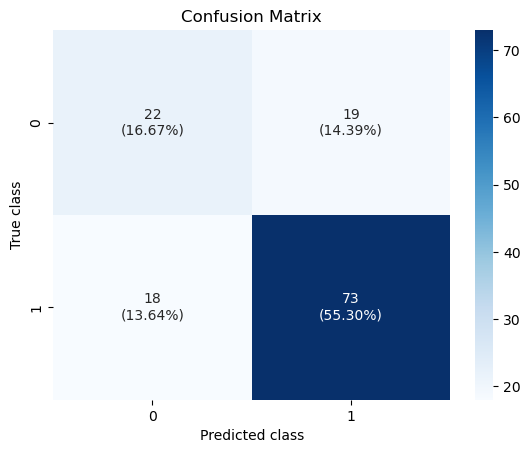


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.55      0.54      0.54        41
         1.0       0.79      0.80      0.80        91

    accuracy                           0.72       132
   macro avg       0.67      0.67      0.67       132
weighted avg       0.72      0.72      0.72       132

--------------------------------------------------------------------


In [82]:
# vedo se la prob di predirre 0 è uguale per il 'Gender' maschile e femminile


testModelWithConfusionMatrix(dtc, X_maschi_train, y_maschi_train, X_maschi_test, y_maschi_test)


DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.5862068965517241


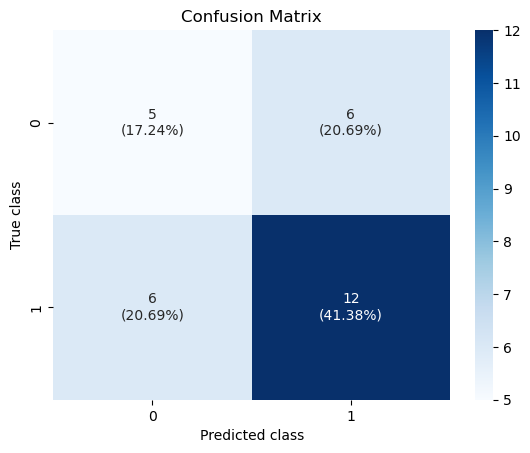


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.45      0.45      0.45        11
         1.0       0.67      0.67      0.67        18

    accuracy                           0.59        29
   macro avg       0.56      0.56      0.56        29
weighted avg       0.59      0.59      0.59        29

--------------------------------------------------------------------


In [83]:
testModelWithConfusionMatrix(dtc, X_femm_train, y_femm_train, X_femm_test, y_femm_test)

DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.725


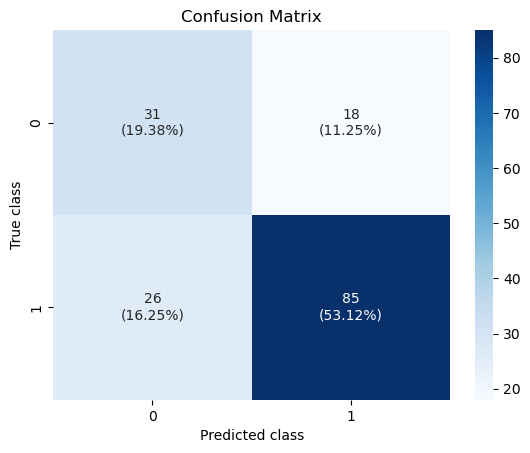


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.54      0.63      0.58        49
         1.0       0.83      0.77      0.79       111

    accuracy                           0.73       160
   macro avg       0.68      0.70      0.69       160
weighted avg       0.74      0.72      0.73       160

--------------------------------------------------------------------


In [84]:
#droppo il Gender

X.drop('Gender', axis = 1, inplace = True)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, stratify = y)

testModelWithConfusionMatrix(dtc, X_train, y_train, X_test, y_test)


   Dependents  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  \
1         1.0        0.0            0.0             4583             1508.0   
2         0.0        0.0            1.0             3000                0.0   
3         0.0        1.0            0.0             2583             2358.0   
4         0.0        0.0            0.0             6000                0.0   
5         2.0        0.0            1.0             5417             4196.0   

   LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  
1       128.0             360.0             1.0            0.0  
2        66.0             360.0             1.0            2.0  
3       120.0             360.0             1.0            2.0  
4       141.0             360.0             1.0            2.0  
5       267.0             360.0             1.0            2.0  
DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.725


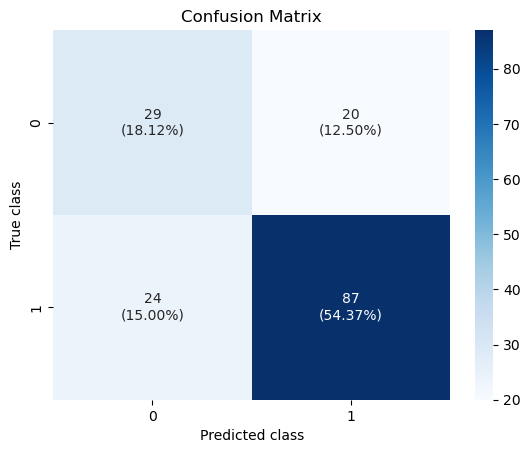


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

         0.0       0.55      0.59      0.57        49
         1.0       0.81      0.78      0.80       111

    accuracy                           0.73       160
   macro avg       0.68      0.69      0.68       160
weighted avg       0.73      0.72      0.73       160

--------------------------------------------------------------------


In [85]:

X.drop('Married', axis = 1, inplace = True)
print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, stratify = y)

testModelWithConfusionMatrix(dtc, X_train, y_train, X_test, y_test)

## 2.5

In [88]:
dataset = pd.read_csv('loan_sanction_train.csv')
dataset.head()
dataset.drop('Loan_ID', axis = 1, inplace = True) # lo elimino perchè è l'identificativo di ogni utente ed è inutile nella predizione di loan status
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [93]:
categorical_columns = categoricalColumns(dataset)
categorical_columns



['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [94]:
take_columns = [dataset.columns.get_loc('Gender'), dataset.columns.get_loc('Married'), dataset.columns.get_loc('Education'), dataset.columns.get_loc('Self_Employed'), dataset.columns.get_loc('Property_Area'), dataset.columns.get_loc('Loan_Status'), dataset.columns.get_loc('LoanAmount'), dataset.columns.get_loc('Loan_Amount_Term'), dataset.columns.get_loc('Credit_History'), dataset.columns.get_loc('ApplicantIncome'), dataset.columns.get_loc('Dependents')]
take_columns

[0, 1, 3, 4, 10, 11, 7, 8, 9, 5, 2]

In [105]:
X = dataset.drop('Loan_Status', axis = 1)
y = dataset['Loan_Status']


In [114]:
X = categoricalToNumerical(X)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, dataset['Loan_Status'], test_size = 1/3, stratify = dataset['Loan_Status'])

In [120]:
dataset.columns.get_loc('LoanAmount')

7

In [123]:
# pipeline 
# SimpleImputer (median)
# Normalizer
#col_trasf per fare ordinal encoder su col categoriche
# ordinal encoder su colonne categoriche -> uso function trasformer con funzione
# discretizzo in 10 bin 'LoanAmount'
# SelectKBest con k = 5
# KNN

imputer = SimpleImputer(strategy = 'most_frequent')
normalizer = Normalizer()
discretizer = KBinsDiscretizer(n_bins = 10, encode = 'ordinal')
col_trasf = ColumnTransformer(transformers = [('discretizer', discretizer, 7)], 
                                               remainder = 'passthrough')
selector = SelectKBest(k = 5)
knn = KNeighborsClassifier()


pipeline = Pipeline( steps= [('imputer', imputer), ('normalizer', normalizer), 
                              ('selector', selector), ('knn', knn)] )

pipeline



Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('normalizer', Normalizer()), ('selector', SelectKBest(k=5)),
                ('knn', KNeighborsClassifier())])

In [124]:
testModel(pipeline, X_train, y_train, X_test, y_test)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('normalizer', Normalizer()), ('selector', SelectKBest(k=5)),
                ('knn', KNeighborsClassifier())])
accuracy train:  0.7750611246943765
accuracy test:  0.6926829268292682
--------------------------------------------------------------------


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('normalizer', Normalizer()), ('selector', SelectKBest(k=5)),
                ('knn', KNeighborsClassifier())])

In [127]:
#grid search con n_neighbors e weights e il k del selectkbest
# su pipeline

param_grid = {'knn__n_neighbors': np.arange(1, 50), 'knn__weights': ['uniform', 'distance']
              , 'selector__k': np.arange(1, 5)}
gridSearch(pipeline, param_grid, None, X_train, y_train, X_test, y_test)

best parameters:  {'knn__n_neighbors': 16, 'knn__weights': 'uniform', 'selector__k': 1}
with accuracy:  0.8190003011141223

acc sul train del modello con i parametri ottimizzati:  0.8190709046454768
acc del modello con i parametri ottimizzati: :  0.7853658536585366
--------------------------------------------------------------------


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('normalizer', Normalizer()), ('selector', SelectKBest(k=1)),
                ('knn', KNeighborsClassifier(n_neighbors=16))])